In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank1=bank[['age','balance','housing','loan','duration','campaign','pdays','previous','y']]
bank1


,age,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,2143,yes,no,261,1,-1,0,no
1,44,29,yes,no,151,1,-1,0,no
2,33,2,yes,yes,76,1,-1,0,no
3,47,1506,yes,no,92,1,-1,0,no
4,33,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,977,3,-1,0,yes
45207,71,1729,no,no,456,2,-1,0,yes
45208,72,5715,no,no,1127,5,184,3,yes
45209,57,668,no,no,508,4,-1,0,no


In [8]:
bank2=pd.get_dummies(bank1,columns=['housing','loan','y'])
bank2.drop(["y_no","housing_no","loan_no"],inplace=True,axis = 1)
bank2

,age,balance,duration,campaign,pdays,previous,housing_yes,loan_yes,y_yes
0,58,2143,261,1,-1,0,1,0,0
1,44,29,151,1,-1,0,1,0,0
2,33,2,76,1,-1,0,1,1,0
3,47,1506,92,1,-1,0,1,0,0
4,33,1,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,1
45208,72,5715,1127,5,184,3,0,0,1
45209,57,668,508,4,-1,0,0,0,0


In [9]:
X=bank2.iloc[:,0:7]
Y=bank2.iloc[:,8]

In [10]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Akash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = classifier.predict(X)


y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[38976   946]
 [ 4110  1179]]


In [13]:
(38976+1179)/(38976+1179+4110+946)*100

88.81688084758133

In [14]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.60      0.63     45211
weighted avg       0.86      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

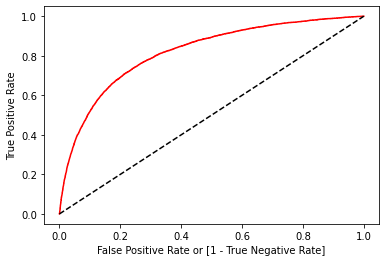

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
